<a href="https://colab.research.google.com/github/EkanshSaraf/TitanicProblem/blob/Logistic-regression/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Configuration Path to Kaggle JSON File and Change of Present Working Directory

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle_Titanic"

%cd/content/gdrive/MyDrive/Kaggle_Titanic
!pwd

Download Kaggle Dataset to Drive

In [ ]:
!kaggle competitions download -c titanic
!ls

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.linear_model import LogisticRegression # Logistic Regression

In [3]:
df_train  = pd.read_csv('/content/gdrive/MyDrive/Kaggle_Titanic/train.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Kaggle_Titanic/test.csv')

df_comb = pd.concat([df_train,df_test]) #concat the test and train datasets
print(df_comb.shape)
df_comb.info()
#df_comb.describe(include=object)
df_comb.head()

(1309, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df_comb.drop(['Cabin','PassengerId','Ticket'],axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


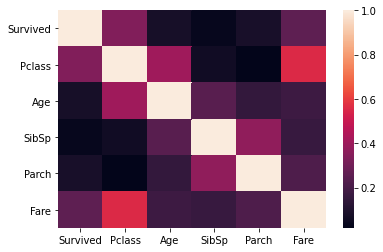

In [5]:
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix)

Categorization of Features

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]

continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

categorical_features = list(set(list(df.columns)).difference(set(numerical_features)))

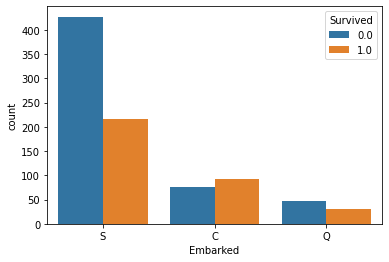

In [7]:
sns.countplot(x='Embarked',hue='Survived',data=df)

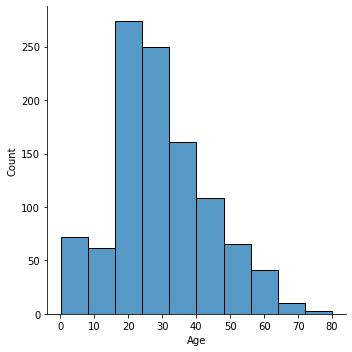

In [8]:
sns.displot(x='Age',data=df,bins=10)
plt.show()

Handling Missing Values

In [ ]:
df['Cabin'].unique()

In [9]:
def Salutation(x):
  if 'Mr.' in x:
    return 'Mr.'
  elif 'Miss.' in x:
    return 'Miss.'
  else:
    return 'Mrs.'

def Age(x,y):
  if np.isnan(y):
    if x=='Mr.':
      return(df[df['Pclass']==1]['Age'].median())
    elif x=='Miss.':
      return(df[df['Pclass']==2]['Age'].median())
    else:
      return(df[df['Pclass']==3]['Age'].median())
  else:
    return y

df['Salutation'] = df['Name'].apply(lambda x: Salutation(x))

df['Age'] = df.apply(lambda x: Age(x.Pclass,x.Age),axis=1)

df['Embarked'].fillna('S',inplace=True)

df['Fare'].fillna(df['Fare'].mean(),inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Name        1309 non-null   object 
 3   Sex         1309 non-null   object 
 4   Age         1309 non-null   float64
 5   SibSp       1309 non-null   int64  
 6   Parch       1309 non-null   int64  
 7   Fare        1309 non-null   float64
 8   Embarked    1309 non-null   object 
 9   Salutation  1309 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 152.5+ KB


Vizualize Continuous Features

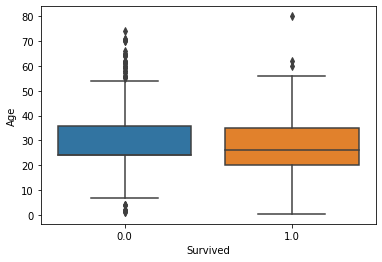

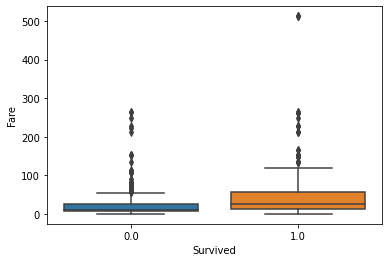

In [10]:
sns.boxplot(x='Survived',y='Age',data=df[df['Sex']=='male'])
plt.show()
sns.boxplot(x='Survived',y='Fare',data=df)#medians different
plt.show()

df1 = df.drop(['Name','Salutation'],axis=1)

Vizualize Categorical Features

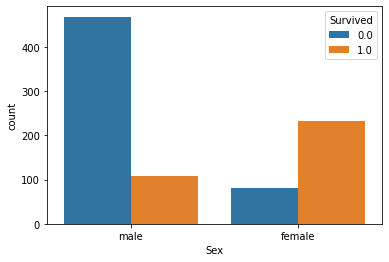

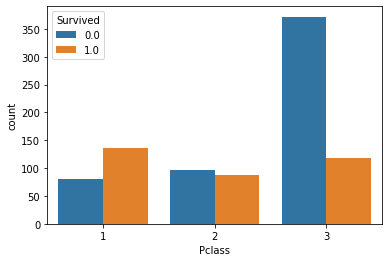

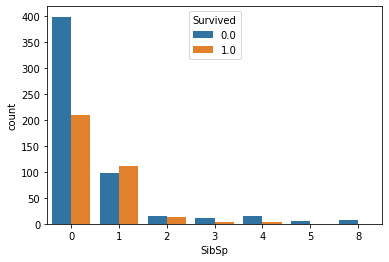

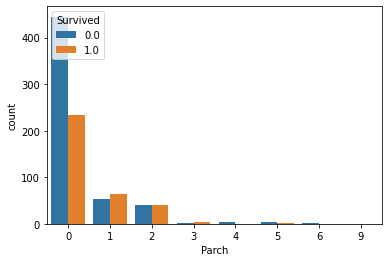

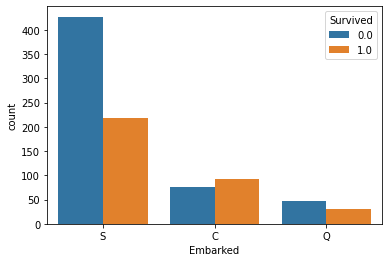

In [11]:
sns.countplot(x='Sex',hue='Survived',data=df1)
plt.show()

sns.countplot(x='Pclass',hue='Survived',data=df1)
plt.show()

sns.countplot(x='SibSp',hue='Survived',data=df1)
plt.show()

sns.countplot(x='Parch',hue='Survived',data=df1)
plt.show()

sns.countplot(x='Embarked',hue='Survived',data=df1)
plt.show()

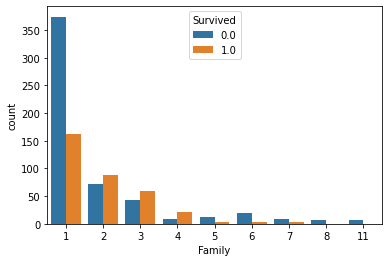

In [12]:
df1['Family'] = df1['SibSp'] + df1['Parch'] + 1
df1.head()

sns.countplot(x='Family',hue='Survived',data=df1)

In [13]:
df2 = df1.drop(['SibSp','Parch'],inplace=False,axis=1)

df3 = pd.get_dummies(df2,columns=['Pclass','Sex','Embarked','Family'],prefix=['Pclass','Sex','Embarked','Family'])

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   Fare      1309 non-null   float64
 5   Embarked  1309 non-null   object 
 6   Family    1309 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 121.8+ KB


In [ ]:
df2['Family'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

Logistic Regression

In [22]:
df3['Fare_Norm'] = (df3['Fare']-df3['Fare'].mean())/df3['Fare'].std()
df3['Age_Norm'] = (df3['Age']-df3['Age'].mean())/df3['Age'].std()

train_df = df3.head(891)
test_df = df3.tail(1309-891)

train_x = train_df.drop(['Survived','Fare','Age'],inplace=False,axis=1)
train_y = train_df['Survived']
test = test_df.drop(['Survived','Fare','Age'],inplace=False,axis=1)

X_train,X_val,y_train,y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.3, random_state = 42)

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
prediction_lr = model_lr.predict(X_val)

round(accuracy_score(prediction_lr,y_val)*100,2)

81.72